# House Price Prediction  

## 1 Loading libraries and Dataset

In [40]:
import numpy as np 
import pandas as pd
import keras
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing

In [41]:
# Uploading the dataset from keras datasets
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()
# Uploading and labeling the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

## 2 Describing the shape, mean, max and min of the dataset

In [42]:
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

## 3 Find the correlation

<AxesSubplot:>

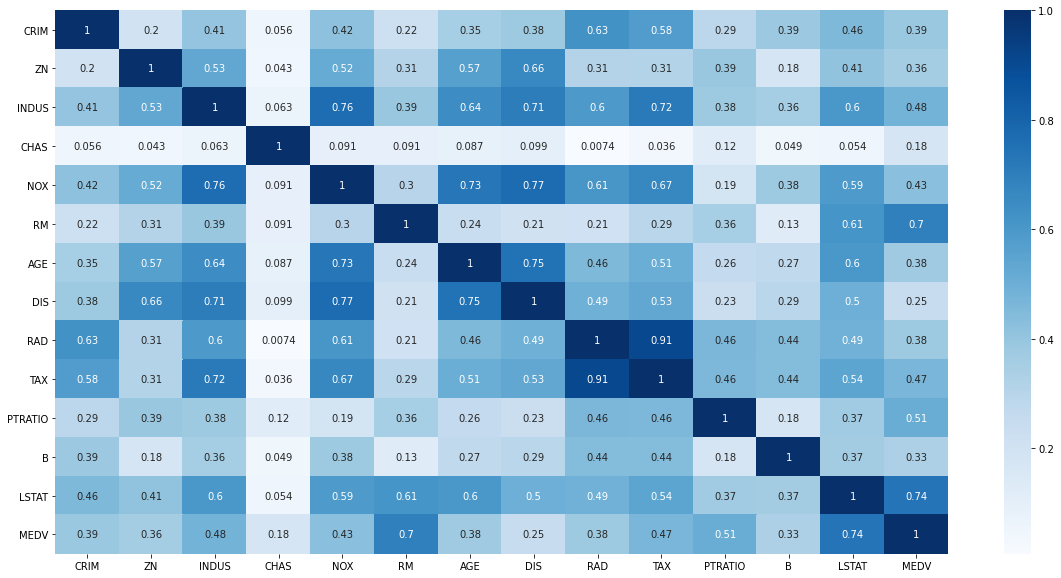

In [43]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True, cbar=True, cmap='Blues')

## 4 Defining the batch size, epochs and input size

In [44]:
batch_size = 32
epochs = 800
inp_shape = train_features.shape[1]

## 5 Normalize the data by using Z score

In [45]:
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean) / train_std

## 6 Defining the model

In [46]:
model = Sequential([
    Dense(20, activation='relu', input_shape=(inp_shape,)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

## Exectuting the MLP model

In [47]:
history = model.fit(train_features, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)

model.evaluate(test_features, test_labels)

572 - mae: 1.7244 - mse: 6.3572 - val_loss: 5.6014 - val_mae: 1.9934 - val_mse: 5.6014
Epoch 681/800
12/12 [==============================] - 0s 5ms/step - loss: 6.3200 - mae: 1.7267 - mse: 6.3200 - val_loss: 5.6777 - val_mae: 1.9997 - val_mse: 5.6777
Epoch 682/800
12/12 [==============================] - 0s 5ms/step - loss: 6.3171 - mae: 1.7289 - mse: 6.3171 - val_loss: 5.6213 - val_mae: 1.9947 - val_mse: 5.6213
Epoch 683/800
12/12 [==============================] - 0s 5ms/step - loss: 6.3387 - mae: 1.7303 - mse: 6.3387 - val_loss: 5.6705 - val_mae: 1.9988 - val_mse: 5.6705
Epoch 684/800
12/12 [==============================] - 0s 4ms/step - loss: 6.2829 - mae: 1.7211 - mse: 6.2829 - val_loss: 5.6411 - val_mae: 2.0004 - val_mse: 5.6411
Epoch 685/800
12/12 [==============================] - 0s 5ms/step - loss: 6.2943 - mae: 1.7179 - mse: 6.2943 - val_loss: 5.6460 - val_mae: 1.9978 - val_mse: 5.6460
Epoch 686/800
12/12 [==============================] - 0s 5ms/step - loss: 6.3014 - mae:

[1962930.625, 1320.238525390625, 1962930.625]

## 8 Comparing Mean Squad Error and Value Loss

(0.0, 100.0)

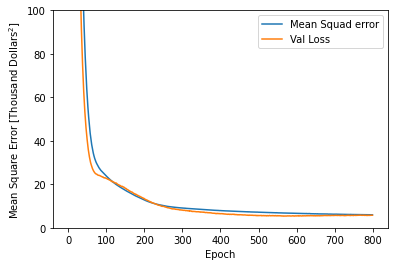

In [48]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch


plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
plt.plot(hist['epoch'], hist['mse'], label='Mean Squad error')
plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
plt.legend()
plt.ylim([0,100])

In [49]:
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 15.9537 - mae: 2.5883 - mse: 15.9537


In [50]:
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

Root Mean Square Error on test set: 3.994
